In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout, ZeroPadding2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import exceptions

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

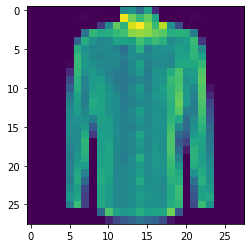

In [6]:
plt.imshow(X_train[3000])

Text(0.5, 1.0, '3')

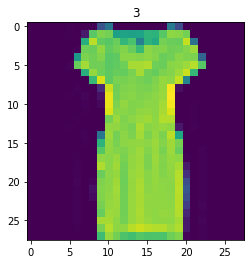

In [7]:
plt.imshow(X_train[20])
plt.title(y_train[20])

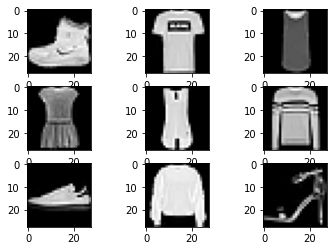

In [8]:
#plot hte fist few images
for i in range(9):
    #define the subplot
    plt.subplot(330 + 1 + i)
    #plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
#summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Add Labels

In [11]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Plot images with labels

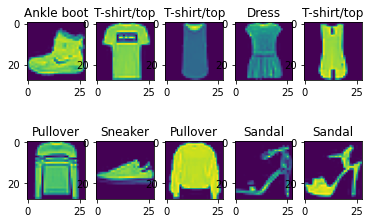

In [12]:
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    plt.savefig('Dataset Sample', dpi=150)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i]]);

### Verify color range

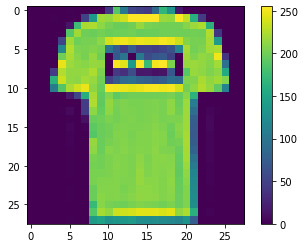

In [12]:
plt.imshow(X_train[1])
plt.colorbar();

### Build the model

In [13]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

2022-01-20 01:12:06.018909: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile model

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

### Train

In [15]:
fitted = model.fit(X_train, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 2.1514 - accuracy: 0.6831 - val_loss: 0.7379 - val_accuracy: 0.7253
Epoch 2/3
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7175 - accuracy: 0.7344 - val_loss: 0.6135 - val_accuracy: 0.7818
Epoch 3/3
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6505 - accuracy: 0.7598 - val_loss: 0.5413 - val_accuracy: 0.8204


### Plot epoch accuracy

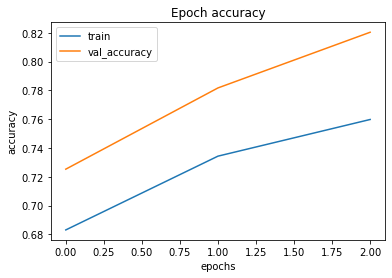

In [16]:
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val_accuracy'])
plt.savefig('Epoch Accuracy');

### Plot epoch loss

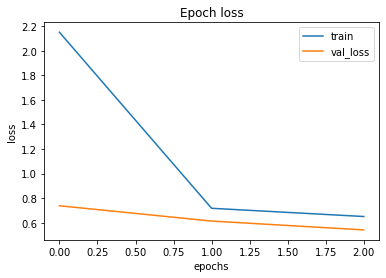

In [17]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val_loss'])
plt.savefig('Epoch Loss');

### Test

In [18]:
res_train = model.predict(X_train)

In [19]:
res_test = model.predict(X_test)

### Compare predictions

In [21]:
item = 1
pd.DataFrame({
    'test_res': np.argmax(res_train[item]),
    'model_res': np.argmax(res_test[item]),
    'true_val': y_test[item]
}, index=[item])

,test_res,model_res,true_val
1,0,2,2


### Test

In [22]:
# evaluate models
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5568 - accuracy: 0.8105


[0.556816816329956, 0.8105000257492065]

In [29]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [33]:
probability_model = Sequential([model, layers.Softmax()])

In [34]:
predictions = probability_model.predict(X_test)

In [36]:
predictions[0]

array([0.08761583, 0.08761583, 0.08761583, 0.08761583, 0.08761583,
       0.10738109, 0.08761583, 0.08988272, 0.08761583, 0.1894254 ],
      dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [39]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [25]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])